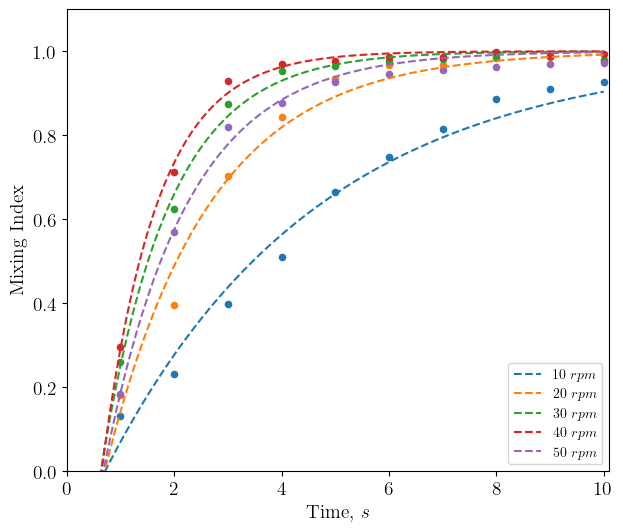

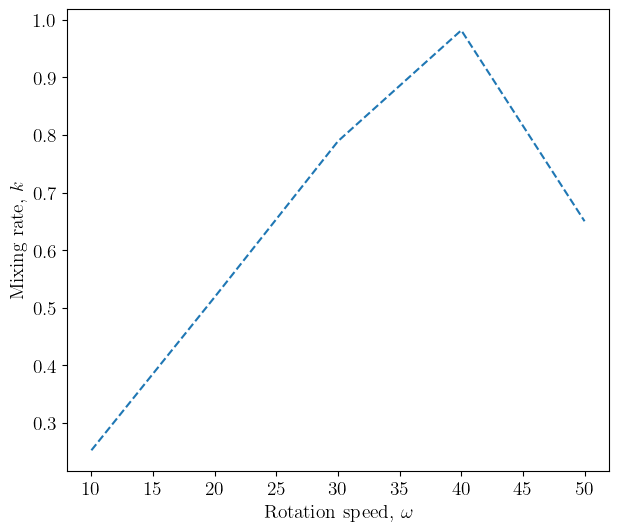

In [1]:
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scipy.optimize
import csv

#  
plt.rc('font', family='serif')
plt.rc('figure',figsize=(7, 6))
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)
#

with open('mixing equation parameters.csv','w') as file:
        writer = csv.writer(file)
        writer.writerow(['Speed M(0) stdv k stdv R^2'])


def mix_equation(t, M0, k):
    return 1 - (1 - M0) * np.exp(-k * t)

t = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

mixing_index = [[0.1304882948, 0.2317198203, 0.3982392033, 0.5103490544, 0.6641999504, 0.7474391455, 0.8149284697, 0.8855912776, 0.9096853129, 0.9265719399],
                       [0.1811275947, 0.3964092669, 0.7029307812, 0.8434971201, 0.9338260794, 0.9679513702, 0.9662239138, 0.9836038473, 0.9875503093, 0.9770694779],
                       [0.2596882551, 0.6254402085, 0.8742538141, 0.952795913, 0.9646687517, 0.9771382034, 0.9826680657, 0.9872999693, 0.9885995569, 0.978439552],
                       [0.2954917525, 0.7137045334, 0.9296376352, 0.9698692424, 0.9760371827, 0.9853727403, 0.9860848029, 0.9981035172, 0.9894106445, 0.9935216144],
                       [0.183467915, 0.5685714017, 0.8185821922, 0.8770367658, 0.9278048578, 0.9462516361, 0.9565993532, 0.9625206059, 0.9686966706, 0.9719315395],
                       ]

# Generate a finer time array for plotting
t_fit = np.linspace(0, max(t), 100)

# Extract the estimated parameters
M0 = [] 
k = []
mix_fit = []

index = np.array([10,20,30,40,50])
#curve fitting
for i in range (0,5):
    parameters, covariance = curve_fit(mix_equation, t, mixing_index[i])
    # Extract the estimated parameters
    M0_fit, k_fit = parameters
    M0.append(M0_fit)
    k.append(k_fit)
    mix_fit.append(mix_equation(t_fit, M0_fit, k_fit))
    
    #to calculate Rsquared
    standarddev = np.sqrt(np.diag(covariance))
    residuals = mixing_index[i] - mix_equation(t,parameters[0],parameters[1])
    squaresumofresiduals = np.sum(residuals**2)
    squaresum = np.sum((mixing_index[i]-np.mean(mixing_index[i]))**2)
    R2 = 1 - (squaresumofresiduals/squaresum)
    
    with open('mixing equation parameters.csv','a') as file:
        writer = csv.writer(file)
        writer.writerow([f'{index[i]} {round(M0_fit, 3)} {round(standarddev[1],3)} {round(k_fit,3)} {round(standarddev[0],3)} {round(R2,2)}'])
    
    #to print the graph
    #plt.figure()
    plt.scatter(t, mixing_index[i],s=20)
    plt.plot(t_fit, mix_equation(t_fit, M0_fit, k_fit),'--',label=fr'{index[i]} $rpm$',linewidth=1.5)
    #plt.plot(t_fit, mix_equation(t_fit, M0_fit, k_fit),'--')
    #plt.xlim(0,10)
    plt.xlabel(r'Time, $s$', fontsize = 14)
    plt.ylabel('Mixing Index',fontsize = 14)
    #plt.grid(True)
    plt.legend(loc='lower right')
    plt.xlim(0.,10.1)
    plt.ylim(0.,1.1)
    if i == 4:
        plt.savefig(f"mixing rate.png", dpi=600, pad_inches = 0, bbox_inches='tight')
        plt.savefig(f"mixing rate.pdf", dpi=600, pad_inches = 0, bbox_inches='tight')


x = [10,20,30,40,50]
plt.figure() 
plt.plot(x, k, '--')
plt.xlabel(r'Rotation speed, $\omega$',fontsize = 14)
plt.ylabel('Mixing rate, $k$',fontsize = 14)
plt.savefig(f"k value.png", dpi=600, pad_inches = 0, bbox_inches='tight')
plt.savefig(f"k value.pdf", dpi=600, pad_inches = 0, bbox_inches='tight')
plt.show()